<a href="https://colab.research.google.com/github/Han-Seung-Heon/hello-world/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist

# MNIST 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 크기 출력
print(f"훈련 데이터 크기: {x_train.shape}")  # (60000, 28, 28)
print(f"테스트 데이터 크기: {x_test.shape}")  # (10000, 28, 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
훈련 데이터 크기: (60000, 28, 28)
테스트 데이터 크기: (10000, 28, 28)


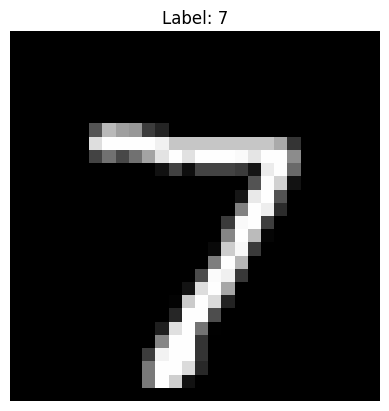

In [3]:
import numpy as np
import matplotlib.pyplot as plt
index=0
image=x_test[index]
label= y_test[index]
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models


model= models.Sequential([
#컨볼루션층 하나 통과
    layers.Conv2D(filters=32, kernel_size=(2,2), strides= (1,1), padding="same", activation="relu", input_shape=(28,28,1)),
#맥스풀링
    layers.MaxPooling2D(pool_size=(2,2),padding="same"),
#두번째 층
    layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),padding="same",activation= "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),

#세 번째 층
    layers.Conv2D(filters=128, kernel_size=(3,3),strides=(3,3),padding="same",activation="relu"),

#1차원으로 변환
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10, activation="softmax")

])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,714 (612.16 KB)

 Trainable params: 156,714 (612.16 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 2e-3),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])


In [6]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=10)
history=model.fit(x_train,y_train_one_hot,batch_size= 64, epochs=3 , validation_split=0.2)

Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.8625 - loss: 0.1582 - val_accuracy: 0.9733 - val_loss: 0.0188
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9805 - loss: 0.0145 - val_accuracy: 0.9827 - val_loss: 0.0128
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9867 - loss: 0.0100 - val_accuracy: 0.9835 - val_loss: 0.0122


In [7]:
y_test_one_hot = to_categorical(y_test, num_classes=10)
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9809 - loss: 0.0129
Test Accuracy: 0.9834


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


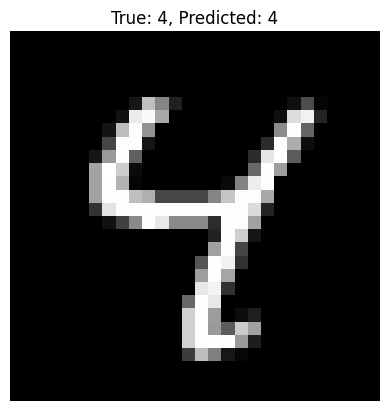

In [8]:
sample_image=x_test[6]
sample_label=y_test_one_hot[6]

predicted_label= np.argmax(model.predict(sample_image[np.newaxis, ...]))
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True: {np.argmax(sample_label)}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()

In [ ]:

for w, x in zip(x_test, y_test):
  y_test_one_hot = to_categorical(x, num_classes=10)
  predicted_label= np.argmax(model.predict(w[np.newaxis, ...]))
  plt.imshow(w.squeeze(), cmap='gray')
  plt.title(f"True: {np.argmax(y_test_one_hot)}, Predicted: {predicted_label}")
  plt.axis('off')
  plt.show()